# Program to recognize digits using SVM
#### Vishal (17-Aug-2019)

### Importing the necessary libraries

In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#from scipy import misc
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Loading the Digits dataset and segregating features and labels

In [2]:
digits = datasets.load_digits()
features = digits.data 
labels = digits.target

### Shuffling the data followed by Train and Test data split

In [3]:
features, labels = shuffle(features, labels, random_state=13) # always shuffle the data to eliminate any hidden patterns.
X, X_test, y, y_test = train_test_split(features, labels, test_size=0.35, random_state=42)

In [4]:
print (X.shape)
print (y.shape)

(1168, 64)
(1168,)


### Defining SVC parameters and training the Classifier

In [5]:
clf = SVC(gamma = 0.001)
clf.fit(X, y)

SVC(gamma=0.001)

### Running the model on the test data

In [6]:
y_pred = clf.predict(X_test)

### Metrics - Classification

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.97      1.00      0.98        64
           2       1.00      1.00      1.00        64
           3       1.00      0.96      0.98        57
           4       1.00      1.00      1.00        71
           5       0.99      0.97      0.98        69
           6       1.00      1.00      1.00        55
           7       0.99      1.00      0.99        67
           8       1.00      0.96      0.98        52
           9       0.97      1.00      0.98        61

    accuracy                           0.99       629
   macro avg       0.99      0.99      0.99       629
weighted avg       0.99      0.99      0.99       629



### Metrics - Confusion Matrix

In [8]:
print(confusion_matrix(y_test, y_pred, labels=range(10)))

[[69  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  1  0  1  0  0]
 [ 0  0  0  0 71  0  0  0  0  0]
 [ 0  0  0  0  0 67  0  0  0  2]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 67  0  0]
 [ 0  2  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0 61]]


### Visually and Randomly checking the Predictions against the Actual data

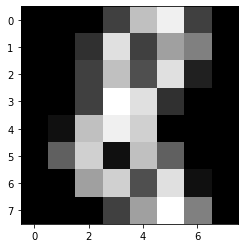

Predicted: 8 - Actual: 8


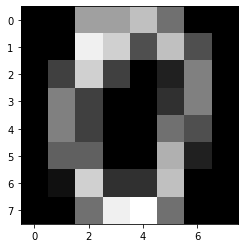

Predicted: 0 - Actual: 0


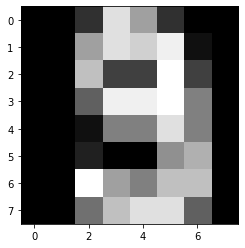

Predicted: 9 - Actual: 9


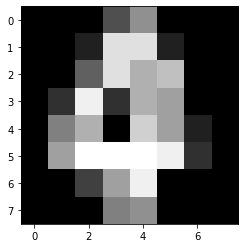

Predicted: 4 - Actual: 4


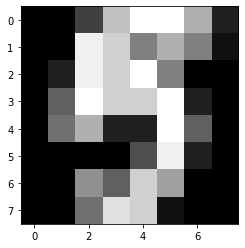

Predicted: 5 - Actual: 5


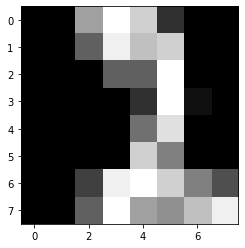

Predicted: 2 - Actual: 2


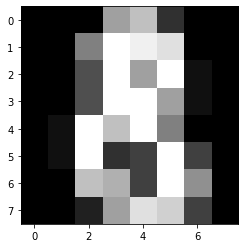

Predicted: 8 - Actual: 8


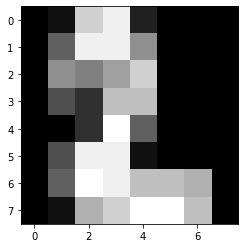

Predicted: 2 - Actual: 2


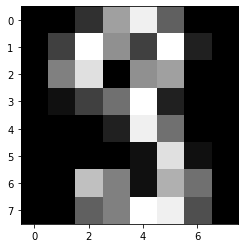

Predicted: 3 - Actual: 3


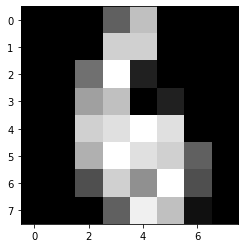

Predicted: 6 - Actual: 6


In [9]:
#fig = plt.figure()
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(10):
    idx = np.random.randint(y_test.shape[0])
    #ax = fig.add_subplot(5, 2, i+1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.show()
    print ("Predicted: {} - Actual: {}".format(y_pred[idx], y_test[idx]))